<a href="https://colab.research.google.com/github/emilygolf/Predicting-Seismicity/blob/main/Data_exploration_STATS112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project | Stats 112 | Emily Snell | Exploration and Visualization

---
This colab explores and visualizes my eruption and earthquake data I have collected and cleaned. 

Now let's get started!


# Terminology and Context

---



Before I go any further, I think it is useful to define a few terms and relationships. Since I have cleaned and narrowed down my data, I can define what is being used and explored. (read only if you are interested!) 

**Eruption:** a volcanic eruption is defined as an event where lava (and often gas) are released from a volcanic structure

**Volcanic "Type":** in my data sets I have a term called "Type". Volcanic type has been developed to group or label volcanoes based on key characteristics. To abreviate, these characteristics can span how many lava vents (conduits) the volcano has, how big the conduits are, the shape of the volcano ediface (surface), what type of rocks make up the ediface, how the volcano formed, and it's general style of eruption. Based on this information I would assume Type will be a key link between earthquake and eruption behavior! I will add more information below if you are interested in reading more.

**VEI:** The Volcanic Explosivity Index (VEI) is a scale that describes the size of explosive volcanic eruptions based on magnitude and intensity. The numerical scale (from 0 to 8) is a logarithmic scale, and is generally analogous to the Richter and other magnitude scales for the size of earthquakes. This relates to the viscosity and exsplosivity of the lava as well as how much lava was erupted.

**Magnitude, depth, magnitude error:** these terms relate to the earthquakes associated with my eruptions. Magnitude is on the Richter scale, and relates to the amplitude and energy of the seismic waves associated with the event. The depth refers to the depth of the epicenter of the earthquake below the surface in kilometers. Finally the magnitude error is the errors associated with the estimated magnitude for that earthquake.  

**Active and extinct volcanoes:** An extinct volcano is a volcano that has not erupted in 10,000 years and is speculated to no longer have a supply of magma. Active volcanoes are ones that are erupting and have magma supplied. As we'll likely see, the volcanoes I am predicting at will likely be different ones than in my training data since some of the volcanoes will be extinct/dormant. However, what is more important is that the modern and ancient volcanoes are similar in type and VEI since that relates to the volcanic strucutre and eruption style.  

**Date Columns**: "Date" is the time of an earthquake, "Start Date" and "End Date" mark the start and end times of the corresponding eruption if the earthquake occured during an eruption. NOTE if an earthquake does not correspond to an eruption the "Start Date" value is the same as the "Date" value as those mean the same thing, and the "End Date" value is NaN since there is no eruption time period.



**Additional Reading:**

Much of my work is on the chemistry of volcanoes. Chemistry is important for volcanoes because it controls how they erupt, which can be the difference between knowing wether a future eruption will be hazardous or not. As mentioned above, the type a volcanoe is classified as relies on characteristics like the physical structure and even lava type. These characteristics boil down to the chemical characteristics. For example, shield volcanoes, like the volcanoes in Hawaii, are volcanoes with a shallow sloping ediface. The ediface is formed in that way because the lava is so fast moving that it can not cool quick enough to form steep sides, like at stratovolcanoes. The lava is fast moving because it is classified as basalt, meaning there is more iron and magnesium present than other lavas. Because there is more iron and magnesium, there is less silica (relatively). Lower silica content in lavas means it will be less viscous since silica forms silica-tetrahedra bonds which are polymerized and strong. More silica, means the lava will be harder to move and more viscous! What this also means is more silica rich lavas will be thicker and harder to exsolve out gasses. This is why stratovolcanoes are so dangerous and their eruptions so large and "messy" because the gas trapped in the magma explodes out as it reaches the earth's surface and pressure is rapidly decreased. This is known as an exsplosive eruption. This is just one instance on the importance of chemistry at volcanoes!

# Read in the Data

In [1]:
#load in data from my personal github
#figure out how to read in data from git so no need to upload locally 
import requests
import pandas as pd
import os 
!git clone https://github.com/emilygolf/Final-Project.git

Cloning into 'Final-Project'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 152 (delta 22), reused 60 (delta 17), pack-reused 79
Receiving objects: 100% (152/152), 9.53 MiB | 10.19 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [2]:
#move to the right folder to acess the data 
%cd /content/Final-Project/DataSci\ Final\ Project

/content/Final-Project/DataSci Final Project


In [3]:
eq_erupt_df = pd.read_csv('Eq_erupt.csv')

In [4]:
#my seismic and eruption data 
eq_erupt_df=eq_erupt_df.dropna(subset=['latitude_earthquake'])

In [5]:
eq_erupt_df

,Unnamed: 0,level_0,index,time,latitude_earthquake,longitude_earthquake,depth,mag,horizontalError,depthError,magError,Date,Volcano Name,Country,Type,Start Date,latitude_eruption,longitude_eruption,VEI,End Date
0,0,6.0,792.0,NaN,2.917000,-76.057000,12.100,6.80,NaN,NaN,NaN,1/15/11,"Huila, Nevado del",Colombia,Stratovolcano,10/26/08,2.930,-76.030,5.0,1/14/12
1,1,7.0,4528.0,NaN,10.851000,-85.316000,161.800,4.30,NaN,NaN,NaN,8/10/94,Rincon de la Vieja,Costa Rica,Complex volcano,10/26/08,NaN,NaN,NaN,NaN
2,2,19.0,31.0,NaN,64.653800,-17.520600,6.630,4.60,6.90,3.40,0.076,6/21/18,Bardarbunga,Iceland,Stratovolcano,10/26/08,NaN,NaN,NaN,NaN
3,3,20.0,84.0,NaN,64.631500,-17.505000,6.650,4.50,3.00,4.70,0.085,2/1/15,Bardarbunga,Iceland,Stratovolcano,8/29/14,64.633,-17.516,1.0,2/27/15
4,4,21.0,128.0,NaN,64.666000,-17.487000,2.500,5.30,6.80,3.90,NaN,11/23/14,Bardarbunga,Iceland,Stratovolcano,8/29/14,64.633,-17.516,1.0,2/27/15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15433,15433,15707.0,18639.0,2017-04-08T14:11:28.810Z,19.475500,-155.642700,7.905,3.20,0.80,2.90,0.191,2/1/15,Mauna Loa,United States,Shield volcano,2/25/96,NaN,NaN,NaN,NaN
15434,15434,15708.0,18640.0,2017-04-08T14:11:28.810Z,19.475500,-155.642667,4.380,3.23,0.24,0.38,0.191,2/1/15,Mauna Loa,United States,Shield volcano,2/25/96,NaN,NaN,NaN,NaN
15435,15435,15709.0,18733.0,2016-11-09T10:07:47.170Z,19.459833,-155.588501,44.610,2.57,1.09,1.28,NaN,1/30/15,Mauna Loa,United States,Shield volcano,2/25/96,NaN,NaN,NaN,NaN
15436,15436,15710.0,18772.0,2016-09-06T14:25:57.620Z,19.461000,-155.592667,-1.830,3.79,0.24,0.23,0.220,1/27/15,Mauna Loa,United States,Shield volcano,2/25/96,NaN,NaN,NaN,NaN


In [6]:
#historical eruptions
historical_eruptions_df = pd.read_csv('historical_eruptions.csv')

In [7]:
historical_eruptions_df

,Unnamed: 0,Name,Date,VEI,Type_x,Volcano Name,Country,Location,Latitude,Longitude,Type_y
0,0,Aniakchak,1450C,5,Caldera,Aniakchak,United States,Alaska Peninsula,56.880,-158.170,Caldera
1,1,Kuwae,1452,6,Caldera,Kuwae,Vanuatu,Vanuatu-SW Pacific,-16.829,168.536,Caldera
2,2,Bardarbunga,1477,5,Stratovolcano,Bardarbunga,Iceland,Iceland-NE,64.633,-17.516,Stratovolcano
3,3,St. Helens,1480D,5,Stratovolcano,St. Helens,United States,US-Washington,46.200,-122.180,Stratovolcano
4,4,St. Helens,1540,5,Stratovolcano,St. Helens,United States,US-Washington,46.200,-122.180,Stratovolcano
5,5,St. Helens,18-May-80,5,Stratovolcano,St. Helens,United States,US-Washington,46.200,-122.180,Stratovolcano
6,6,Billy Mitchell,1580C,6,Ash shield,Billy Mitchell,Papua New Guinea,Bougainville-SW Paci,-6.092,155.225,Pyroclastic shield
7,7,Raung,1593,5,Stratovolcano,Raung,Indonesia,Java,-8.119,114.056,Stratovolcano
8,8,Huaynaputina,1600,6,Explosion crater,Huaynaputina,Peru,Peru,-16.608,-70.850,Stratovolcano
9,9,Parker,"Jan. 4, 1641",6,Stratovolcano,Parker,Philippines,Mindanao-Philippines,6.113,124.892,Stratovolcano


In [8]:
#now only what I need
history_df=historical_eruptions_df[['Name', 'VEI', 'Date', 'Country', 'Latitude', 'Longitude', 'Type_x']]

In [9]:
history_df

,Name,VEI,Date,Country,Latitude,Longitude,Type_x
0,Aniakchak,5,1450C,United States,56.880,-158.170,Caldera
1,Kuwae,6,1452,Vanuatu,-16.829,168.536,Caldera
2,Bardarbunga,5,1477,Iceland,64.633,-17.516,Stratovolcano
3,St. Helens,5,1480D,United States,46.200,-122.180,Stratovolcano
4,St. Helens,5,1540,United States,46.200,-122.180,Stratovolcano
5,St. Helens,5,18-May-80,United States,46.200,-122.180,Stratovolcano
6,Billy Mitchell,6,1580C,Papua New Guinea,-6.092,155.225,Ash shield
7,Raung,5,1593,Indonesia,-8.119,114.056,Stratovolcano
8,Huaynaputina,6,1600,Peru,-16.608,-70.850,Explosion crater
9,Parker,6,"Jan. 4, 1641",Philippines,6.113,124.892,Stratovolcano


# Geo Data Frames for Maps!

---



We are working with spatial data so lets make a map!

First we have to make our geo data frames :) 

In [10]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 28.3 MB/s eta 0:00:00


In [11]:
import geopandas as gpd

In [12]:
gpd.datasets.get_path("naturalearth_lowres")

'/usr/local/lib/python3.9/dist-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp'

In [13]:
!ls /usr/local/lib/python3.9/dist-packages/geopandas/datasets/naturalearth_lowres/

naturalearth_lowres.cpg  naturalearth_lowres.prj  naturalearth_lowres.shx
naturalearth_lowres.dbf  naturalearth_lowres.shp


In [14]:
import folium
import matplotlib.pyplot as plt

In [15]:
#making a smaller data frame for my geopandas data frame 
df_map = eq_erupt_df[['Volcano Name', 'latitude_eruption', 'longitude_eruption', 'Country', 'Type']]

In [16]:
#making my geo data frame for my historical data 
geometry_2 = gpd.points_from_xy(history_df.Longitude, history_df.Latitude)
history_geo_df = gpd.GeoDataFrame(
    historical_eruptions_df[["Name", "Latitude", "Longitude","Country", "Type_x"]], geometry=geometry_2
)

history_geo_df

,Name,Latitude,Longitude,Country,Type_x,geometry
0,Aniakchak,56.880,-158.170,United States,Caldera,POINT (-158.17000 56.88000)
1,Kuwae,-16.829,168.536,Vanuatu,Caldera,POINT (168.53600 -16.82900)
2,Bardarbunga,64.633,-17.516,Iceland,Stratovolcano,POINT (-17.51600 64.63300)
3,St. Helens,46.200,-122.180,United States,Stratovolcano,POINT (-122.18000 46.20000)
4,St. Helens,46.200,-122.180,United States,Stratovolcano,POINT (-122.18000 46.20000)
5,St. Helens,46.200,-122.180,United States,Stratovolcano,POINT (-122.18000 46.20000)
6,Billy Mitchell,-6.092,155.225,Papua New Guinea,Ash shield,POINT (155.22500 -6.09200)
7,Raung,-8.119,114.056,Indonesia,Stratovolcano,POINT (114.05600 -8.11900)
8,Huaynaputina,-16.608,-70.850,Peru,Explosion crater,POINT (-70.85000 -16.60800)
9,Parker,6.113,124.892,Philippines,Stratovolcano,POINT (124.89200 6.11300)


In [17]:
#now do the same for my seismic and eruption data set 
geometry = gpd.points_from_xy(df_map.longitude_eruption, df_map.latitude_eruption)
geo_df = gpd.GeoDataFrame(
    df_map[["Volcano Name", "latitude_eruption", "longitude_eruption","Country", "Type"]], geometry=geometry
)

geo_df

,Volcano Name,latitude_eruption,longitude_eruption,Country,Type,geometry
0,"Huila, Nevado del",2.930,-76.030,Colombia,Stratovolcano,POINT (-76.03000 2.93000)
1,Rincon de la Vieja,NaN,NaN,Costa Rica,Complex volcano,POINT EMPTY
2,Bardarbunga,NaN,NaN,Iceland,Stratovolcano,POINT EMPTY
3,Bardarbunga,64.633,-17.516,Iceland,Stratovolcano,POINT (-17.51600 64.63300)
4,Bardarbunga,64.633,-17.516,Iceland,Stratovolcano,POINT (-17.51600 64.63300)
...,...,...,...,...,...,...
15433,Mauna Loa,NaN,NaN,United States,Shield volcano,POINT EMPTY
15434,Mauna Loa,NaN,NaN,United States,Shield volcano,POINT EMPTY
15435,Mauna Loa,NaN,NaN,United States,Shield volcano,POINT EMPTY
15436,Mauna Loa,NaN,NaN,United States,Shield volcano,POINT EMPTY


In [18]:
import matplotlib.pyplot as mat

# Map 1: Volcanic Locations

---



My first map will plot sites where I have seismic data (in green) and site I am predicting seismicity at (in red)



/usr/local/lib/python3.9/dist-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


Text(0.5, 1.0, 'Volcanoes')

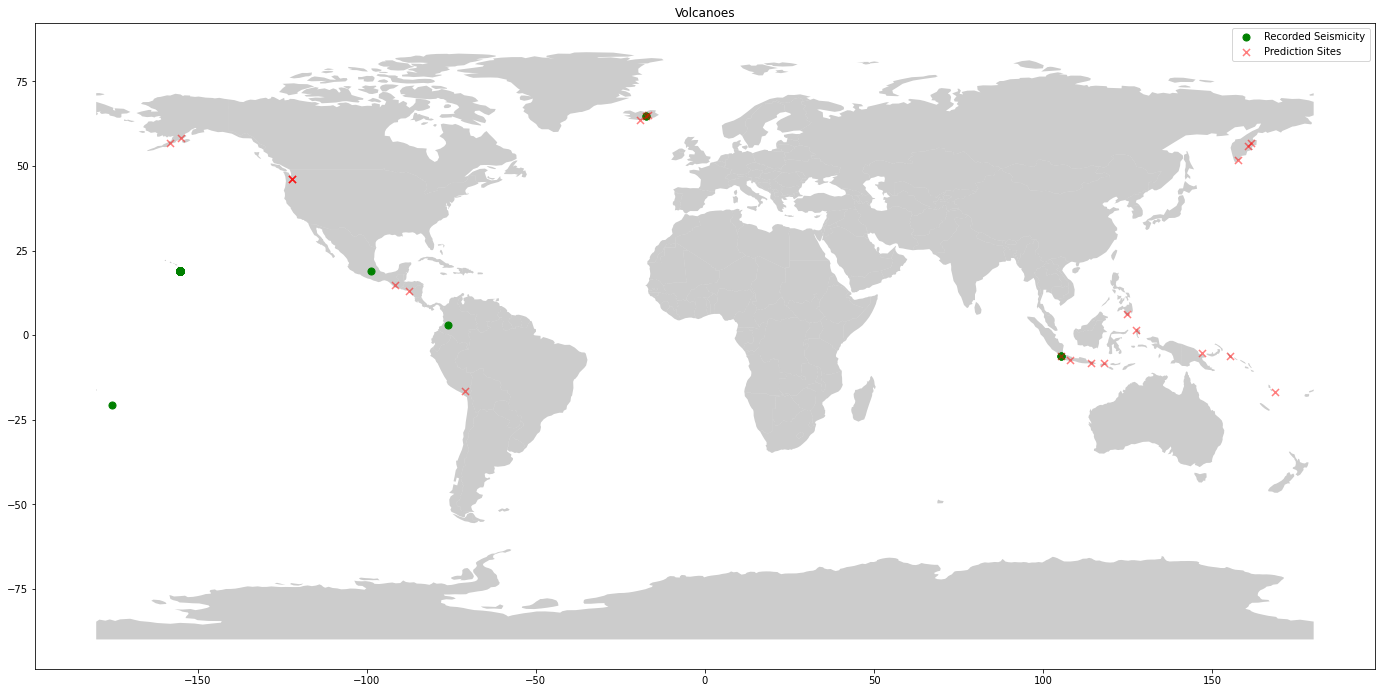

In [19]:
#let's make a map!
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(figsize=(24, 18))
world.plot(ax=ax, alpha=0.4, color="grey")
geo_df.plot(column="Type", ax=ax, legend=True, alpha=1, color='g', markersize=50, label='Recorded Seismicity')
history_geo_df.plot(column="Type_x", ax=ax, legend=True, color='r', alpha=0.5, marker='x', markersize=50, label='Prediction Sites')
ax.legend()
plt.title("Volcanoes")

Observations: as we can see, we only have a few (2-3) site where the volcano, or a near neighbor, appears in both the training and testing data sets. However, geospatially, I can see that we have a good mix of geologic settings (hot spots and arc volcanoes) in both data sets which is promising. 

I can see that we have eruption and seismic data at Iceland, which is also a site we will be predicting at. It appears three historical eruptions are at iceland. 

In indonesia we also have a location where we have existing modern seismic data in the exact location we will be predicting. 

Similarly in central and south america we have neighboring volcanoes I will be traning and then predicting at. 

Now that we have some surface level observations let's keep digging!

# Map 2: Earthquake locations and magnitudes

Next I will plot the magnitude of earthquakes along with the sites I am predicting at (still in red) 

/usr/local/lib/python3.9/dist-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


Text(0.5, 1.0, 'Earthquakes')

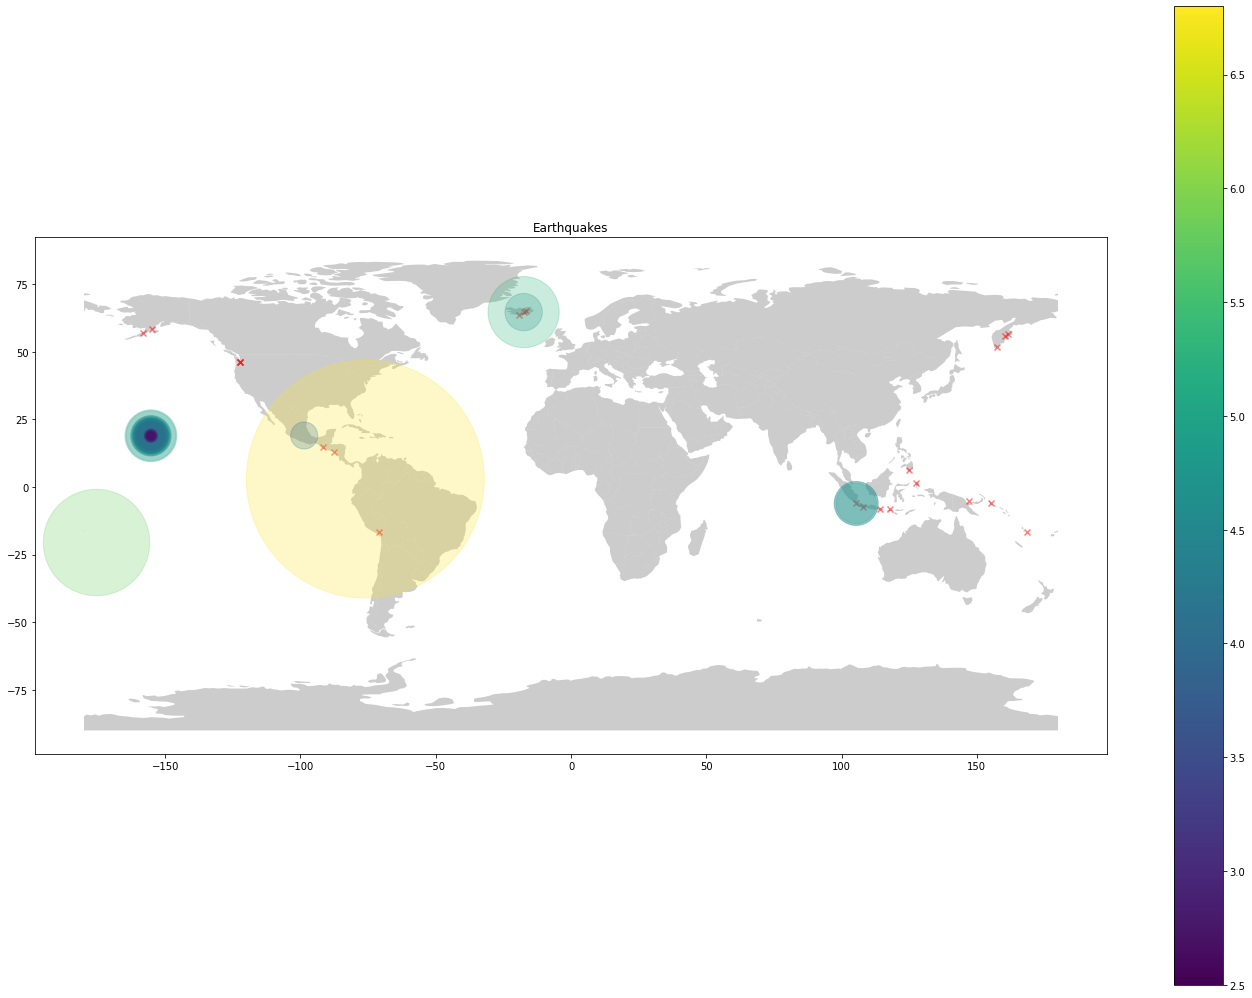

In [20]:
#plot the seismic events geospatially

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(figsize=(24, 18))
world.plot(ax=ax, alpha=0.4, color="grey")
history_geo_df.plot(column="Type_x", ax=ax, legend=True, color='r', alpha=0.5, marker='x', label='Sites of Prediction')
geo_df.plot(ax=ax, legend=True, alpha=0.25, column=eq_erupt_df["mag"], markersize=5 ** eq_erupt_df["mag"], label='Earthquakes')
plt.title("Earthquakes")

To aid understanding below will be a graphic to understand the severity of different earthquake magnitudes!

In this graph, the color and size of the points are representative of the magnitude. 

From this graph I can see that my data set has a good mix of earthquake magnitudes, with some very large events in Central America and the Pacific Ocean.

Hawaii, a very active hot-spot volcano, has a wider range of earthquake magnitudes, though they are within a range of 2.5 - 4.5. Magnitudes 2-4 can be associated with swinging objects or lose objects falling in a home. 

Central America has had very large earthquakes (6-7) as well as a volcano in the Pacific South at a magnitude around 5-5.5. In this range, structural damage can affect buildings and houses and cause movement of furniture. So these would be considerably dangerous earthquakes.  

Indonesia and Iceland have had medium to small range earthquakes at 4-5.5. This range is again dangerous, but buildings are not susseptible to major damage. 


Now we have a visualization of earthquakes let's take a look at eruption magnitude! (aka VEI).

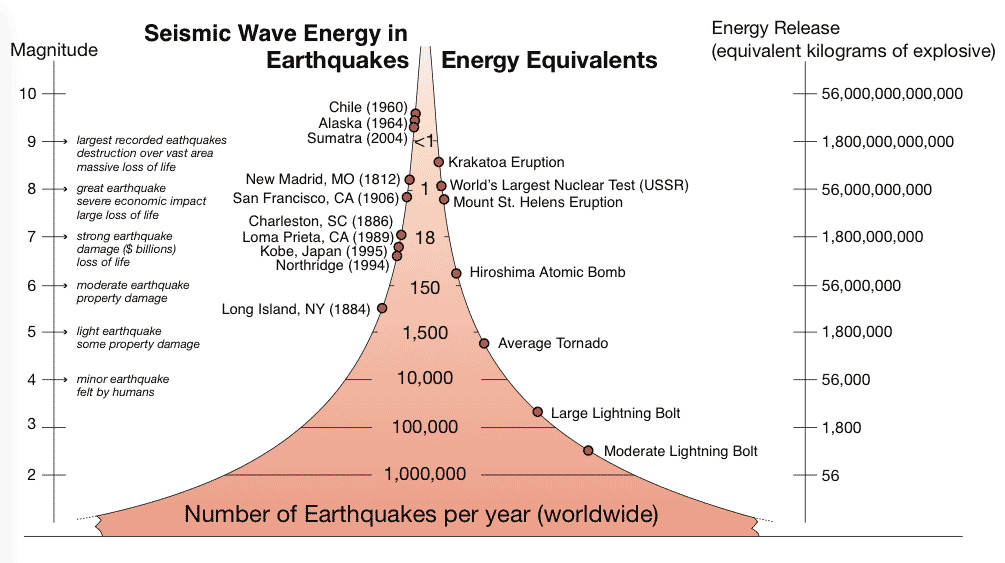

# Map 3: Eruption Magnitude (VEI) 

Now let's replicate the above plot but with eruption magnitude instead of earthquake (let's keep our prediction sites in red)

/usr/local/lib/python3.9/dist-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


Text(0.5, 1.0, 'Eruptions')

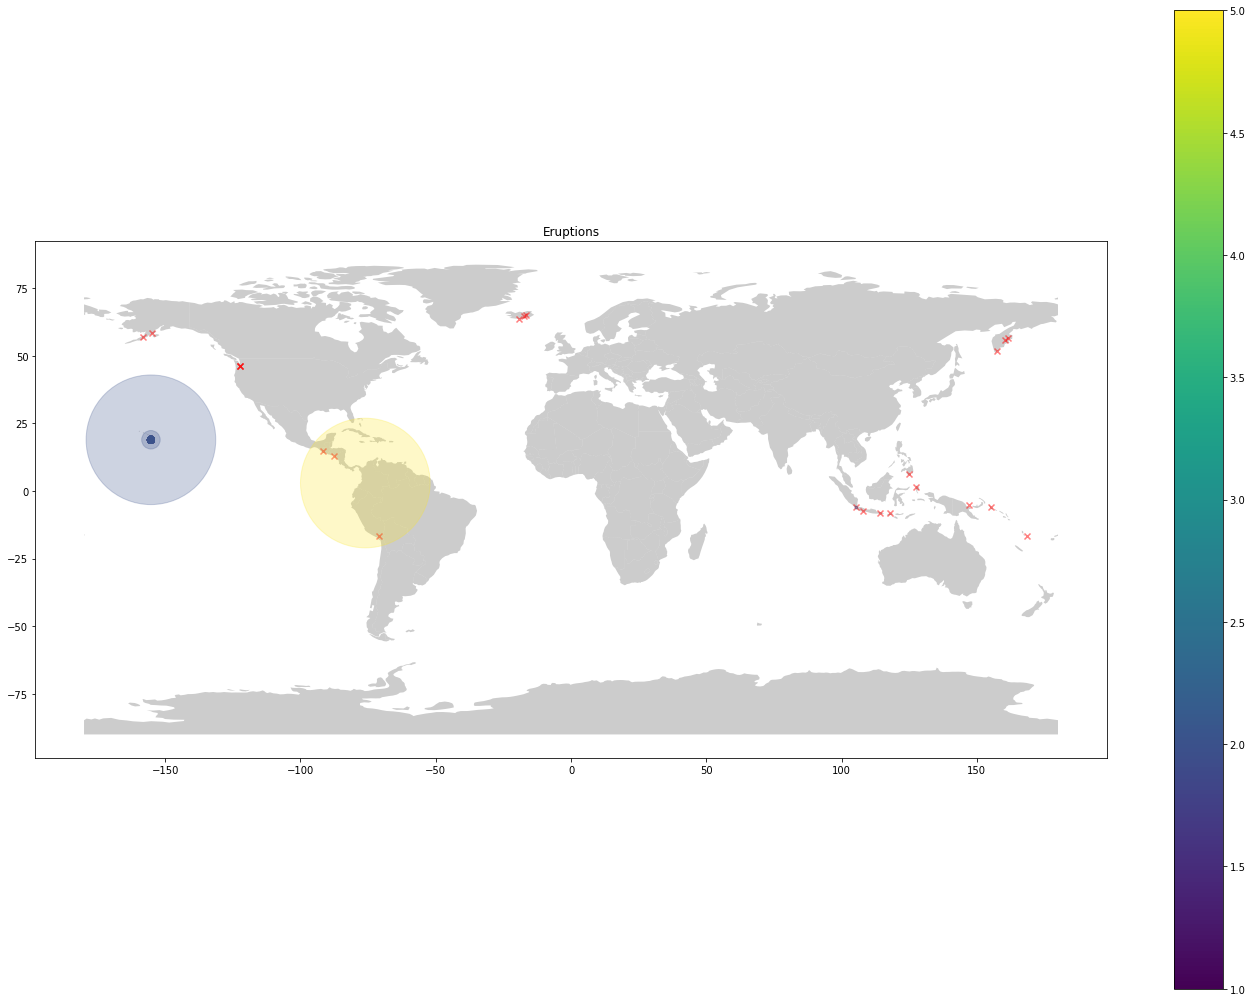

In [21]:

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(figsize=(24, 18))
world.plot(ax=ax, alpha=0.4, color="grey")
history_geo_df.plot(column="Type_x", ax=ax, legend=True, color='r', alpha=0.5, marker='x', label='Sites of Prediction')
geo_df.plot(ax=ax, legend=True, alpha=0.25, column=eq_erupt_df["VEI"], markersize= 7 ** eq_erupt_df["VEI"], label='Earthquakes')
plt.title("Eruptions")

Observations:


As we can see we only have VEI estimates in two locations: Hawaii and Central America. 

Central America seems to have a larger VEI of roughly 5, whereas Hawaii ranges from 1-3. 

I will also note these are only the volcanoes in which I have VEI and earthquake data. There are other eruptions in the data set with have an estimated VEI but there is no corresponding earthquake data. That data will be explored later on :) 

# Finding Trends

---

Lets flesh out different variables to understand trends in the data 

In [22]:
import plotly.express as px
import numpy as np

# Seismic Error and Location?

Let's explore the errors associated with the earthquake magnitude data and if there is a trend with any specific volcanoes

I think it is important to understand if there are any systematic errors associated with my magnitude data and if there are any insights I can gain from it.

In [23]:

fig = px.scatter(eq_erupt_df, x="magError", y="mag", color="Volcano Name", 
                 opacity=0.45, title='Comparing Magnitude with Error', color_discrete_sequence=px.colors.qualitative.Light24)

fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="green",
    legend_title_font_color="green"
)
fig.update_xaxes(title_font_family="Arial")
fig.show()

On the USGS website magError is defined as: 

"Uncertainty of reported magnitude of the event. The estimated standard error of the magnitude. The uncertainty corresponds to the specific magnitude type being reported and does not take into account magnitude variations and biases between different magnitude scales. We report an "unknown" value if the contributing seismic network does not supply uncertainty estimates."

**As we can see my magnitude data is dominated by Kilauea in Hawaii.** The Kilauea data is interesting as there seems to be 2 distinct clusters of magnitude error. I would be interested if each clusters corresponds to two different eruptions. To explore this I will make a similar plot but color by Date.  

In [24]:

fig = px.scatter(eq_erupt_df[eq_erupt_df['Volcano Name']=='Kilauea'], x="magError", y="mag", color="Date", 
                 opacity=0.45, title='Comparing Magnitude with Error over Time at Kilauea', color_discrete_sequence=px.colors.qualitative.Light24)

fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="green",
    legend_title_font_color="green"
)
fig.update_xaxes(title_font_family="Arial")
fig.show()

This plot only shows earthquakes at Kilauea. 

Surpisingly with this plot I can infer that the two clusters contain a huge mix of dates! Both clusters contain eartquakes ranging from 1991 up to 2018. As a result, **the distinct grouping is not the cause of 2 separate eruptions.** 

**This would possibly indicate systematic errors for the stations at Kilauea.** These errors would cause jumps in magError no matter the magnitude of the earthquake (shown by the wide spread in values). The first cluster shows low magnitude error yet a spread in magnitudes. Whereas the second cluster shows a large spread in magnitude error (from 1.5 to 4.5) with varying earthquake magnitude.

Now I am interested to make the first plot without Kilauea so that I can see any other patters at other locations. 

In [25]:
fig = px.scatter(eq_erupt_df[eq_erupt_df['Volcano Name']!='Kilauea'], x="magError", y="mag", color="Volcano Name", 
                 opacity=0.45, title='Comparing Magnitude with Error without Kilauea', color_discrete_sequence=px.colors.qualitative.Light24)

fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="green",
    legend_title_font_color="green"
)
fig.update_xaxes(title_font_family="Arial")
fig.show()

Now we can see that the **two other volcanoes prevalent in my data set are Kama'ehaukanaloa and Mauna Loa** which are two other volcanoes in the Hawaiian islands. This makes sense as Hawaii is a largely popular place to research and many volcanologists conduct research there. 

Luckily, the remainder data shows **low magnitude error despite a range of magnitudes** for the exception of a few outiers at Mauna Loa. 

The down side to my data is that the majority of my earthquake data comes from submarine and hotspot volcanoes in the Hawaiian islands. This might induce uncertainties as I am predicting at a variety of volcanic types. But I will dig more into this later!

Overall, I am not concerned with the magError of my data as the USGS only reports well recorded and peer-reviewed events. However, it is interesting to know that stations at Kilauea are prone to large uncertainties!

# Earthquake Behavior at Different Types of Volcanoes? 

Now let's explore attributes of the earthquakes including magnitude and depth across the different types of volcanoes in our data set to see if there are any trends. I will also color by Country to give additional detail. 

Remember Type refers to many physical and chemcial attributes of the volcano so I hope there are some great insights!

In [26]:

fig = px.scatter(eq_erupt_df, x="depth", y="mag", facet_col="Type", opacity=0.50, 
                 title='Comparing Magnitude and Depth Over Volcanic Type', color='Country')
fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="green",
    legend_title_font_color="green"
)
fig.update_xaxes(title_font_family="Arial")
fig.for_each_annotation(lambda a: a.update(text=a.text.split('=')[-1]))
fig.show()


In this plot there is consistent behavior for Submarine and Shield volcanoes. **These volcanoes have consistently shallow earthquakes (roughly 5-30km) despite reaching high magnitudes.** 

**Stratovolcanoes show a greater mix of earthquake depths**

The **Shield volcano has 2 populations of earthquake depths, one ranging from 5-25/30km and the other sitting aroud 40-60 km's.**

Depth is recorded in kilometers in this data set, so a depth of 33km's relates to the rupture event occuring 33km below the surface of the earth. 33km is a common depth for "shallow" earthquakes, however here, earthquake depth can correspond to the depth of magma storage at the volcanoes. 

As a result I would be interested to compare depths for earthquakes confirmed during an eruption and those not. This would allow me to see if the two populations of eartquakes for the shield volcano is due to eruption activity or some other factor.

# Earthquake Behavior During Eruptions?

Now let's do the same but only include earthquakes which occured during an eruption

In [27]:
fig = px.scatter(eq_erupt_df.dropna(subset='latitude_eruption'), x="depth", y="mag", facet_col="Type", opacity=0.50, 
                 title='Comparing Magnitude and Depth During Eruptions', color='Country')
fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="green",
    legend_title_font_color="green"
)
fig.update_xaxes(title_font_family="Arial")
fig.for_each_annotation(lambda a: a.update(text=a.text.split('=')[-1]))
fig.show()

Interesting results! It looks as though none of the shield volcano data corresponds to eruption activity. Instead we see that the submarine data exclusively shows shallow earthquakes for eruptions. This is also paralleled for Caldera and Strato Volcanoes. 

**The largest take away is that earthquakes during eruptions are exclusively shallow (less than 40km).** 

# For fun... Shield Volcano Depth?

Now out of curiosity I want to plot just the shield volcano data to see if the 2 populations of earthquake depth is the result of 2 different locations 

In [28]:

fig = px.scatter(eq_erupt_df[eq_erupt_df['Type']=='Shield volcano'], x="depth", y="mag", facet_col="Type", color='Volcano Name', opacity=0.50, 
                 title='Comparing Depth of Shield Volcanoes')
fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="green",
    legend_title_font_color="green"
)
fig.update_xaxes(title_font_family="Arial")
fig.for_each_annotation(lambda a: a.update(text=a.text.split('=')[-1]))
fig.show()


My hypothesis is correct!! It looks at though **Kilauea earthquakes are exclusively shallow and in fact less than 20 km, whereas Mauna Loa has deeper earthquakes from 30-60km.** 

This **likely relates to the structure of the volcano** and where the magma chamber lies below the surface. I would hypothesize that the magma chamber for Mauna Loa is deeper than that of Kilauea's!

# How do Earthquakes Change During an Eruption?

To dig deeper let's compare the mean earthquake magnitude and depth for each volcanic type for eruption and non-eruption earthquakes


In [29]:
import plotly.graph_objects as go

In [30]:
#first let's grab the index's of the nan eruption earthquakes (aka the EQ's that did not happened during an eruption)
indexs = []
import math 
i = 0
for latitude in eq_erupt_df['latitude_eruption']:
  if math.isnan(latitude):
    indexs.append(i)
  i += 1

In [31]:
trace1 = go.Bar(y=eq_erupt_df.iloc[indexs,:].groupby('Type')['mag'].mean(), x=eq_erupt_df.groupby('Type')['mag'].mean().index, name="Non-Eruption")
trace2 = go.Bar(y=eq_erupt_df.dropna(subset='latitude_eruption').groupby('Type')['mag'].mean(), x=eq_erupt_df.dropna(subset='latitude_eruption').groupby('Type')['mag'].mean().index, name="Eruption")

fig = go.Figure(data=[trace1, trace2])
fig.update_layout(title="Average Magnitude of Earthquakes", xaxis_title="Volcanic Type", yaxis_title="Mean Magnitude", barmode="group")

fig.show()

As we can see for all volcanic types which there is seismic data, the **average magnitude for earthquakes during an eruption is consistently larger than non-eruptive earthquakes.** **This is particularly true for Stratovolcanoes** which have an average eruptive magnitude of 5.175! 

Strotovolcanoes have both exsplosive and effusive eruptions. **This means stratovolcanoes can be very dangerous and have very explsove eruptions which likely generate large magnitude earthquakes.**

In [32]:
trace1 = go.Bar(y=eq_erupt_df.iloc[indexs,:].groupby('Type')['depth'].mean(), x=eq_erupt_df.groupby('Type')['depth'].mean().index, name="Non-Eruption")
trace2 = go.Bar(y=eq_erupt_df.dropna(subset='latitude_eruption').groupby('Type')['depth'].mean(), x=eq_erupt_df.dropna(subset='latitude_eruption').groupby('Type')['depth'].mean().index, name="Eruption")

fig = go.Figure(data=[trace1, trace2])
fig.update_layout(title="Average Depth of Earthquakes", xaxis_title="Volcanic Type", yaxis_title="Mean Depth", barmode="group")

fig.show()

Interestingly **caldera volcanoes have deeper earthquakes during eruptions whereas stratovolcanoes and submarine volcanoes have shallower earthquakes during eruptions.** 

I would need to do more analysis to understand the exact reason for this difference, but one possible solution is that certain volcanoes have more complex mamgma chambers with deeper chambers more active during eruptions. This is insightful and another reason why type is so important! 

In general, the other two volcanic types, Stratovolcano and Submarine, are consistent with what I would expect which would be shallower earthquakes during eruption due to the movement of magma up to the conduit. 

# Which volcanoes are the most dangerous?

---

Now the million dollar question: "Which volcanoes should we care about?"

let's explore dangerous volcanic types!! And maybe we can pin point the most dangerous volcano in our data set (cue suspensful music) 

My definition of dangerous will include largest eruptions (highest VEI) with high magnitudes for earthquakes, as well as long lasting eruptions (differences between start and end times). 


First let's look at most dangerous type of volcanoes

In [33]:
#let's make a data frame for ease of plotting and exploration!
#here I am adding my magnitude and vei data
Type_average_df = pd.DataFrame(eq_erupt_df.groupby('Type')['mag'].mean())
Type_average_df['VEI'] = eq_erupt_df.groupby('Type')['VEI'].mean()

In [34]:
#now let's make a time difference column so I can easily add that as well
eq_erupt_df['Diff'] = pd.to_datetime(eq_erupt_df['End Date']) - pd.to_datetime(eq_erupt_df['Start Date'])

In [35]:
#now add to new data frame!
Type_average_df['Eruption length'] = eq_erupt_df.groupby('Type')['Diff'].mean()

In [36]:
Type_average_df

,mag,VEI,Eruption length
Type,,,
Caldera,4.500000,2.00000,487 days 08:00:00
Cinder cone,4.500000,NaN,NaT
Complex volcano,4.400000,NaN,NaT
Lava dome,3.100000,NaN,NaT
Shield volcano,2.789274,NaN,NaT
Stratovolcano,4.296970,2.50000,1089 days 06:00:00
Submarine volcano,3.183278,2.01145,165 days 11:10:32.061068702
Submarine volcanoes,4.400000,NaN,NaT


In [37]:
#sorted by most dangerous! 
Type_average_df.sort_values(['VEI', 'mag', 'Eruption length'], ascending=False)[:3]

,mag,VEI,Eruption length
Type,,,
Stratovolcano,4.296970,2.50000,1089 days 06:00:00
Submarine volcano,3.183278,2.01145,165 days 11:10:32.061068702
Caldera,4.500000,2.00000,487 days 08:00:00


As we can see, **stratovolcanoes are the most dangerous volcanic type**, with the highest average earthquake and eruption magnitude along with eruption length. Stratovolcanoes nearly dominate each column with the exception of magnitude where caldera volcanoes actuallt have on average slightly higher magnitude earthquakes! 

So now you know the **watch out for stratovolcanoes!**

# Most Dangerous Volcano?

Now we can repeat but group by volcano name so we can precisely know which volcano is the most dangerous! 

In [38]:
Name_average_df = pd.DataFrame(eq_erupt_df.groupby('Volcano Name')['mag'].mean())
Name_average_df['VEI'] = eq_erupt_df.groupby('Volcano Name')['VEI'].mean()
Name_average_df['Eruption length'] = eq_erupt_df.groupby('Volcano Name')['Diff'].mean()

In [39]:
Name_average_df.sort_values(['VEI', 'mag', 'Eruption length'], ascending=False)[:5]

,mag,VEI,Eruption length
Volcano Name,,,
"Huila, Nevado del",6.800000,5.0,1175 days 00:00:00
Hunga Tonga-Hunga Ha'apai,5.800000,5.0,26 days 00:00:00
Popocatepetl,4.100000,3.0,2818 days 00:00:00
Krakatau,4.666667,2.0,487 days 08:00:00
Kama'ehuakanaloa,3.147677,2.0,166 days 00:00:00


Now our final results!!!!

Drum roll......

**Nevado Del Huila** **is the most dangerous volcano in my data set!!** 
This is a volcano in Columbia and is actually the tallest volcano in the country. This is a strato volcano for reference :) 

Nevado Del Huila has average earthquake of 6.8 magnitude!! And average VEI's of 5.0, with 1175 day long eruptions!! This volcano is very dangerous, though the frequency of eruption would also be taken into account if I had that data available. 

I would stay away from this volcano if visiting Columbia and there was recorded unrest in the area! 


